In [1]:
# attention:
# install neded libs:
# python -m pip install --upgrade pip
# pip install --upgrade --user numpy scipy pandas matplotlib sklearn jupyter tensorflow-gpu keras opencv-python
# install CUDA for the GPU
# start with: 0. go to dir inside some terminal with proper PATH 1. "$ jupyter notebook"

import os
import cv2
import re
import random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential 
from keras import layers, models, optimizers, utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
img_width = 150
img_height = 150
# adapt those paths to the current directories by exchanging \ with /
#C:\Users\mpe\Desktop\MarcelsFolder\coding\machineLearningWithPython\3rdSession\test1

# for VHS: C:/Users/kurs/Desktop/mpe/ml_course/
#TRAIN_DIR = 'C:/Users/kurs/Desktop/mpe/ml_course//3rdSession/d_vs_c/train/' # important: rename the folder!
#TEST_DIR = 'C:/Users/kurs/Desktop/mpe/ml_course//3rdSession/d_vs_c/test1/'

# for home
TRAIN_DIR = 'C:/Users/mpe/Desktop/MarcelsFolder/coding/machineLearningWithPython/3rdSession/train/'
TEST_DIR = 'C:/Users/mpe/Desktop/MarcelsFolder/coding/machineLearningWithPython/3rdSession/test1/'

train_images_dogs_cats_original = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]


In [3]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [4]:
train_images_dogs_cats_original.sort(key=natural_keys)
print("all:", len(train_images_dogs_cats_original))
cats = train_images_dogs_cats_original[0:1300]
dogs = train_images_dogs_cats_original[12500:13800]
#print("CATS:", cats)
#print("\n\n\n\n################################\n\n\n")
#print("DOGS:", dogs)

# combine both sets
train_images_dogs_cats = cats + dogs

test_images_dogs_cats.sort(key=natural_keys)
print("length: ", len(train_images_dogs_cats), " - important: should be 2600!") # why 1300?
#for elem in train_images_dogs_cats:
#    print(elem, "\n")

all: 25000
length:  2600  - important: should be 2600!


In [5]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
        #else:
            #print('neither cat nor dog name present in images')
            
    return x, y

In [6]:
X, Y = prepare_data(train_images_dogs_cats)
print(K.image_data_format())

channels_last


In [7]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

In [8]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 16

In [9]:
model = Sequential()

# begin CNN layer
model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu')) # always some activation function
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # macht die bilder kleiner; reduziert information
# end of CNN layer

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()


W0719 11:16:01.989794 242288 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 11:16:02.005416 242288 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 11:16:02.005416 242288 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 11:16:02.021076 242288 deprecation_wrapper.py:119] From c:\users\mpe\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Pleas

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [10]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow(np.array(X_train)/255, Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val)/255, Y_val, batch_size=batch_size)


In [11]:
train_generator

In [12]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=100, # original 500
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/100
130/130 [==============================] - 27s 206ms/step - loss: 0.7088 - acc: 0.5038 - val_loss: 0.6782 - val_acc: 0.5527
Epoch 2/100
130/130 [==============================] - 26s 202ms/step - loss: 0.6808 - acc: 0.6106 - val_loss: 0.6939 - val_acc: 0.5615
Epoch 3/100
130/130 [==============================] - 26s 201ms/step - loss: 0.6369 - acc: 0.6582 - val_loss: 0.7083 - val_acc: 0.6091
Epoch 4/100
130/130 [==============================] - 26s 199ms/step - loss: 0.6168 - acc: 0.6817 - val_loss: 0.6041 - val_acc: 0.6607
Epoch 5/100
130/130 [==============================] - 26s 199ms/step - loss: 0.5823 - acc: 0.7005 - val_loss: 0.5931 - val_acc: 0.6806
Epoch 6/100
130/130 [==============================] - 26s 199ms/step - loss: 0.5899 - acc: 0.7058 - val_loss: 0.5714 - val_acc: 0.7183
Epoch 7/100
130/130 [==============================] - 26s 199ms/step - loss: 0.5660 - acc: 0.7240 - val_loss: 0.5833 - val_acc: 0.6944
Epoch 8/100
130/130 [===========================

Epoch 61/100
130/130 [==============================] - 26s 199ms/step - loss: 0.3996 - acc: 0.8428 - val_loss: 0.7507 - val_acc: 0.7798
Epoch 62/100
130/130 [==============================] - 26s 200ms/step - loss: 0.3742 - acc: 0.8514 - val_loss: 0.5156 - val_acc: 0.7798
Epoch 63/100
130/130 [==============================] - 26s 201ms/step - loss: 0.3993 - acc: 0.8341 - val_loss: 0.4811 - val_acc: 0.7798
Epoch 64/100
130/130 [==============================] - 26s 200ms/step - loss: 0.3937 - acc: 0.8413 - val_loss: 0.5993 - val_acc: 0.7679
Epoch 65/100
130/130 [==============================] - 26s 201ms/step - loss: 0.3986 - acc: 0.8394 - val_loss: 0.5238 - val_acc: 0.7738
Epoch 66/100
130/130 [==============================] - 26s 200ms/step - loss: 0.3865 - acc: 0.8457 - val_loss: 0.5568 - val_acc: 0.7619
Epoch 67/100
130/130 [==============================] - 26s 199ms/step - loss: 0.3676 - acc: 0.8471 - val_loss: 0.4982 - val_acc: 0.7871
Epoch 68/100
130/130 [===================

In [13]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')
a = model.predict_classes(np.array(X_val)/255)
np.mean(np.reshape(np.array(Y_val),[-1,1]) == a)

0.7865384615384615

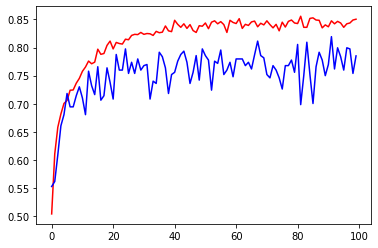

In [14]:
plt.plot(history.history['acc'],color = 'red')
plt.plot(history.history['val_acc'],color = 'blue')


In [15]:
# Looking at some of the mistakes
y_pred = model.predict_classes(np.array(X_val)/255)
ind = np.array(np.where((np.reshape(np.array(Y_val),[-1,1]) != y_pred) & (y_pred == 0)))
ind

array([[ 14,  42,  44,  49,  60,  64,  73,  74,  77,  78,  80,  85,  89,
         93, 102, 118, 119, 124, 131, 142, 143, 152, 163, 186, 187, 188,
        193, 205, 208, 212, 215, 223, 226, 227, 232, 235, 240, 242, 252,
        255, 261, 267, 272, 273, 292, 297, 302, 304, 311, 324, 325, 327,
        328, 334, 344, 346, 353, 356, 368, 380, 381, 387, 388, 396, 405,
        410, 416, 420, 426, 436, 439, 441, 443, 447, 456, 485, 493, 497,
        498, 500, 503, 505, 510, 514],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0]], dtype=int64)

1 -> [0]
1 -> [0]
1 -> [0]
1 -> [0]
1 -> [0]
1 -> [0]
1 -> [0]
1 -> [0]
1 -> [0]
1 -> [0]


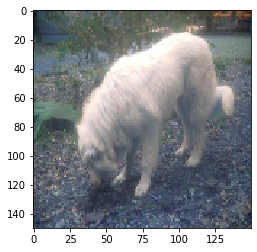

In [20]:
for iter in range(10):
    k = ind[0,iter]
    plt.imshow(X_val[k])
    print(Y_val[k], "->", y_pred[k])

In [17]:
# use this for further checks. for a simple classifier
# https://medium.com/@divyanshuDeveloper/a-simple-animal-classifier-from-scratch-using-keras-61ef0edfcb1f